## Non Positional Encoding for Third Variable

There are four major cases to consider when we want to plot three variables together:

* three numeric variables
* two numeric variables and one categorical variable
* one numeric variable and two categorical variables
* three categorical variables

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. 

Three main non-positional encodings stand out: **shape, size, and color**. 

For **matplotlib** and **seaborn**, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both **qualitative** and **quantitative** data, with different types of color palettes used for different use cases.

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [23]:
# load data
fuel_econ = pd.read_csv('../../Datasets/fuel_econ.csv')

base_color = sb.color_palette()[0]

fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Encoding via Shape

Shape is a good encoding for **categorical variables**, using one shape for each level of the categorical variable. Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the **scatter** or **regplot** function. 

Instead, we need to write a **loop** to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

In [24]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]
fuel_econ_subset['trans_type'] = fuel_econ_subset['trans'].apply(lambda x:x.split()[0])

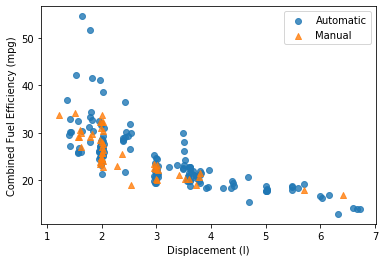

In [25]:
ttype_marker = [['Automatic', 'o'],
                ['Manual', '^']]

for ttype, marker in ttype_marker:
    plot_data = fuel_econ_subset[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data=plot_data, x='displ', y='comb', fit_reg=False, x_jitter=0.04, marker=marker);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');
plt.legend(['Automatic', 'Manual']);

### Encoding via Size

**Point size** is a good encoding for **numeric variables**. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the **"s"** parameter in scatter. (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with regplot.)

**NOTE:**
While the creation of the plot is easier with size, we need to put in extra leg work to create a **legend**. Since, as noted above, legend will only create **one legend entry per plot** function call, we need to create additional dummy scatter objects with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function: the list of plotting objects to depict in the legend, and their labels.

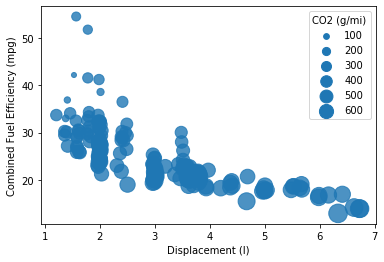

In [34]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', fit_reg=False, x_jitter=0.04, marker='o', scatter_kws={'s':fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');
plt.legend(['co2'])

legend_sizes = []
sizes = [100, 200, 300, 400, 500, 600]
for s in sizes:
    legend_sizes.append(plt.scatter([], [], s=s/3, color=base_color))
plt.legend(legend_sizes, sizes, title='CO2 (g/mi)')

### Encoding via Color
Color is a very common encoding for variables, for both **qualitative** and **quantitative** variables. Position could not be used to encode a value: color for category in a clustered bar chart, and color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart).

If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the **"hue"** parameter on seaborn's FacetGrid class.

**For Nominal Data (trans_type)**

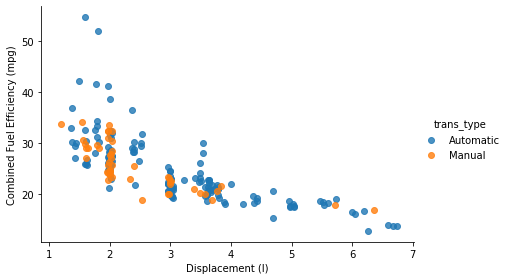

In [54]:
g = sb.FacetGrid(data=fuel_econ_subset, hue = 'trans_type', hue_order=['Automatic', 'Manual'], size=4, aspect=1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
g.add_legend();
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

**For Ordinal Data (VClass): Sequential Palette**

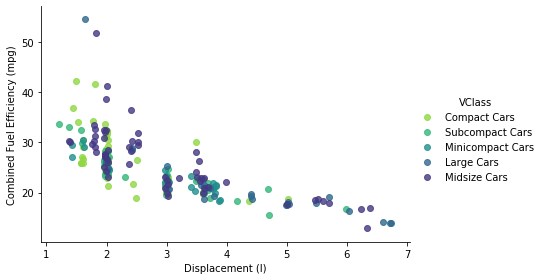

In [57]:
g = sb.FacetGrid(data=fuel_econ_subset, hue = 'VClass', palette='viridis_r', size=4, aspect=1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
g.add_legend();
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

**For Numeric Data (co2)**

**NOTE:** We should **not pass numeric** variable in hue parameter of FacetGrid since **FactGrid only expect to faceit across the categorical variable**, if we do that then it will create a messy and huge legend with one color for each value.

Instead, we can use simple scatter plot with **"c"** parameter set to the third numeric variable

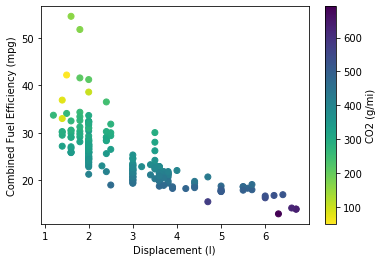

In [64]:
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2', cmap='viridis_r');
plt.colorbar(label='CO2 (g/mi)');

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

### Information about Color Palette

**Color Palettes**
Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider: **qualitative, sequential, and diverging**.

In a **qualitative palette**, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

* **Qualitative palettes** are built for **nominal-type** data. This is the palette class taken by the default palette.

> **sb.palplot(sb.color_palette(n_colors=9))**

<img src='Images/nominal_type.png' style="float:left">

* **Sequential palette** are for other types of data **(ordinal and numeric)**, a choice may need to be made between a sequential scale and a diverging scale. 

In a sequential palette, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. 

The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

> **sb.palplot(sb.color_palette('viridis', 9))**

<img src='Images/sequential_palette.png' style="float:left">


* **Diverging palette** Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is a meaningful **zero or center value** for the variable, you may want to consider using a diverging palette. 

In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

> **sb.palplot(sb.color_palette('vlag', 9))**

<img src='Images/diverging_palette.png' style="float:left">


### Warnings on Color

There are a couple of things to be aware of in general, when working with color. 

* First of all, try and consider **color blindness** when selecting color for your plots. You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness sim.

* Secondly, you want to be aware of the effect of **transparency and overlap** on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data. To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

<img src="Images/Overlapping_Colors.png" style="float:left;" width="200" height="200">